# Random Digits Exercice

### Description:
This is an exercise in hypothesis testing, specifically determining if a series of digits [0,9] is random or not, and if the origin is human (i.e. yourself!). In order to determine this, one has to design and apply statistical tests, from which the degree of consistency of being random can be calculated.

### Your task:
Using tests of your choice/design, determine which of the seven data sets are consistent with being random, and which aren't. One is based on the digits you entered in the course questionaire, while the others range from obviously non-random over poor/quasi random to truly random. See if you among these can determine your (human) dataset.

###  Author: 
 - Troels Petersen ([petersen@nbi.dk](mailto:petersen@nbi.dk))

###  Date:
 - 7th of December 2023

---

In [281]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats
import os, sys                                         # Modules to see files and folders in directories
from os.path import dirname as parent_folder

In [282]:
sys.path.append('../../AppStat2023/External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

In [283]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

---
## Define your functions here:

In [284]:
# Fill 1d histograms:
def create_1d_hist(ax, values, bins, x_range, title):
    ax.hist(values, bins, x_range, histtype='step', density=False, lw=2)         
    ax.set(xlim=x_range, title=title)
    hist_data = np.histogram(values, bins, x_range)
    return hist_data

In [285]:
# Calculate the ChiSquare value for comparison of histogram with constant.
# This is not a fit, as there are no free parameters: We know the number of events and bins!
def get_chi2_ndf( hist, const):
    data = hist[0]
    const_unnormed = const * data.sum()
    chi2 = np.sum( (data - const_unnormed)**2 / data )
    ndof = data.size
    return chi2, ndof

---
## Import random numbers from text file:

In [286]:
# Define list of input files:
dataset_letter='A' # between A and F
infiles = ["data_RandomDigits2023_" + dataset_letter + ".txt" ]

In [287]:
# List containing all numbers:
numbers = []

# Loop over input files open them in read mode
for ifile in infiles : 
    with open( ifile, "r" ) as current_file : 
        # Extract current file info : Loop through each line in the file, loop through each character
        # in the line, demand character is not empty ("") and convert the result to an integer
        # Finally add result to the numbers list
        numbers += [int(char) for line in current_file for char in line.strip() if char != ""]

In [288]:
# Always take a look at the data:
numbers = np.array(numbers)
print(numbers, len(numbers))

[3 9 7 ... 4 5 6] 3269


---
## Define your tests:

Here is an example plot from the data, just for convenience. It is all up to you from here...

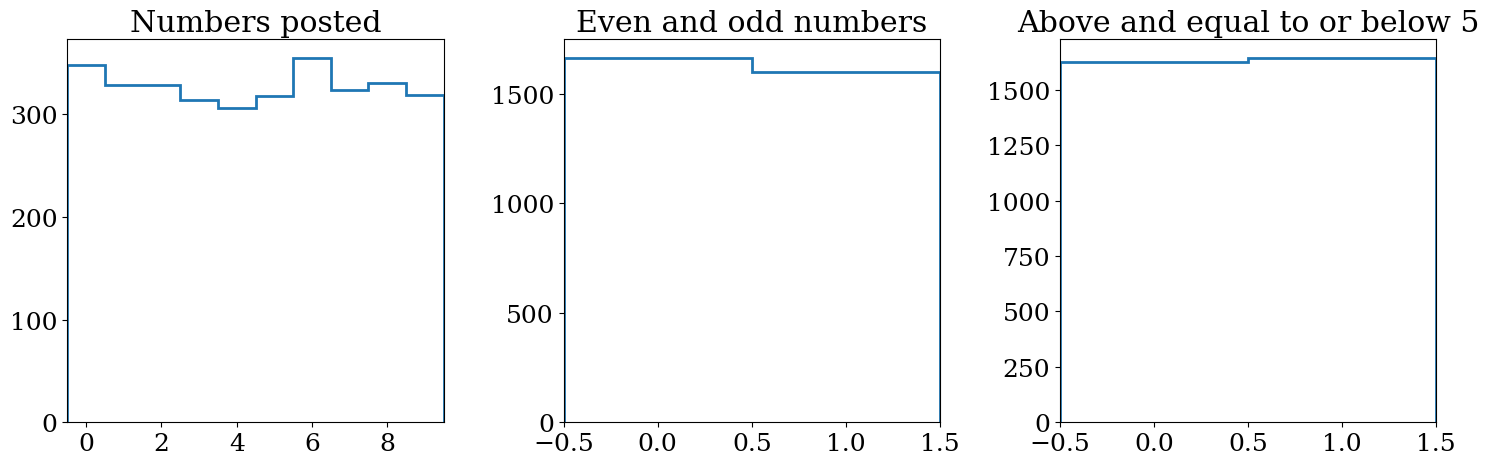

In [289]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax_number, ax_odd_even, ax_high_low = ax.flatten()

# Fill 1d histograms and plot them:
hist_numbers  = create_1d_hist(ax_number,   numbers,     10, (-0.5, 9.5), 'Numbers posted')                # Plot all digits
hist_odd_even = create_1d_hist(ax_odd_even, numbers % 2,  2, (-0.5, 1.5), 'Even and odd numbers')          # Is number even or odd
hist_high_low = create_1d_hist(ax_high_low, numbers // 5, 2, (-0.5, 1.5), 'Above and equal to or below 5') # Is number >= or < 5
fig.tight_layout()

### Comments on even/odd histogram:

What would you expect this distribution to be? Think about it, and then ask, if the distribution observed in data truly follows your expectation. Afterwards, think about the many other tests, that you can perform.

### Note on general goal of hypothesis tests:
Given the outcome of some test, you should try to convert it to a probability or number of sigmas (same thing). Thus determine what you expect, and then see what you observe and what uncertainty your observation has... and determine if this is consistent with the (null) hypothesis, that the data is truly random digits.

---
## Calculate the $\chi^{2}$ given a constant value (Constant is not a free parameter here)

In [290]:
chi2_ndf_number_hist   = get_chi2_ndf( hist_numbers,  1.0 / 10)
chi2_ndf_odd_even_hist = get_chi2_ndf( hist_odd_even, 1.0 / 2 )
chi2_ndf_high_low_hist = get_chi2_ndf( hist_high_low, 1.0 / 2 )

In [291]:
# Write your result: 
print("Compatability that distributions stem from random numbers : ")
print("Raw digits: Prob(Chi2={:6.2f}, Ndof={:2d}) = {:10.8f}".format(chi2_ndf_number_hist[0], chi2_ndf_number_hist[1], 
                                                             stats.chi2.sf(chi2_ndf_number_hist[0], chi2_ndf_number_hist[1])))
print("Odd/Even:   Prob(Chi2={:6.2f}, Ndof={:2d}) = {:10.8f}".format(chi2_ndf_odd_even_hist[0], chi2_ndf_odd_even_hist[1], 
                                                             stats.chi2.sf(chi2_ndf_odd_even_hist[0], chi2_ndf_odd_even_hist[1])))
print("High/Low:   Prob(Chi2={:6.2f}, Ndof={:2d}) = {:10.8f}".format(chi2_ndf_high_low_hist[0], chi2_ndf_high_low_hist[1], 
                                                             stats.chi2.sf(chi2_ndf_high_low_hist[0], chi2_ndf_high_low_hist[1])))

Compatability that distributions stem from random numbers : 
Raw digits: Prob(Chi2=  5.99, Ndof=10) = 0.81615603
Odd/Even:   Prob(Chi2=  1.29, Ndof= 2) = 0.52388783
High/Low:   Prob(Chi2=  0.13, Ndof= 2) = 0.93477015


## Other simple tests

Difference between i and i+1 in list - expect triangle distribution if truely random. 

Length between appearance of number in list - expected exponential distribution if truely random.

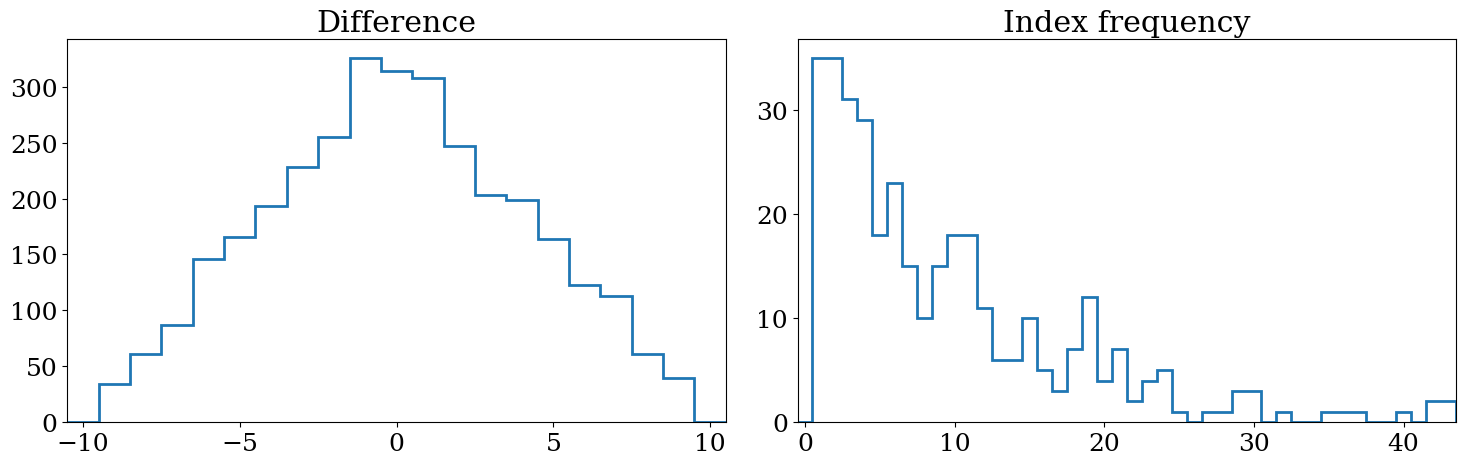

In [292]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax_diff, ax_index = ax.flatten()

numbers_diff = np.diff(numbers)

numbers_index = []
for j in range(10):
    numbers_index.append( np.diff(np.where(numbers==j)))
numbers_index_0 = numbers_index[0][0]

# Fill 1d histograms and plot them:
hist_diff  = create_1d_hist(ax_diff,   numbers_diff,     21, (-10.5, 10.5), 'Difference')                                                         # Difference 
hist_index = create_1d_hist(ax_index,  numbers_index_0,  max(numbers_index_0)+1, (-0.5,  max(numbers_index_0)+0.5), 'Index frequency')                      # Frequency in index of 0 plotted
fig.tight_layout()

Fit the distributions and find a p-value for the fits. 

In [293]:
Nbins = 21
binwidth = (10.5 - (-10.5))/Nbins

def triangle(x, a, b):
    return Nbins * binwidth * a * np.abs(x) + b

# Find the x, y and error on y (sy) given the histogram:
counts_diff, bin_edges_diff = hist_diff
x = (bin_edges_diff[1:] + bin_edges_diff[:-1])/2
y = counts_diff
sy = np.sqrt(counts_diff)   # NOTE: We (naturally) assume that the bin count is Poisson distributed.
                       # This is an approximation, since there is a low count in the last bins.

# Did you make sure, that all bins were non-zero???
x = (bin_edges_diff[1:][counts_diff>0] + bin_edges_diff[:-1][counts_diff>0])/2
y = counts_diff[counts_diff>0]
sy = np.sqrt(counts_diff[counts_diff>0])   # NOTE: We (naturally) assume that the bin count is Poisson distributed.

# Alternatively, use the Chi2 regression from External Functions:
chi2fit = Chi2Regression(triangle, x, y, sy)

# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

minuit_chi2 = Minuit(chi2fit, a=0.0, b=0.0)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.82                      │              Nfcn = 32               │
│ EDM = 6.18e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -1.53   │   0.05    │            │            │         │         │       │
│ 1 │ b    │    323    │     7     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00204 -0.2833 │
│ b │ -0.2833    45.2 │
└───┴─────────────────┘

In [294]:
# First, check if the result was a valid minimum:
if (not minuit_chi2.fmin.is_valid) :
    print("  WARNING: The ChiSquare fit DID NOT converge!!! ")    
    
# Short hand way of accessing the fit parameters:
fit_a, fit_b = minuit_chi2.values[:]   # The fitted values of the parameters

# Loop to get both parameter values and uncertainties:
for name in minuit_chi2.parameters :
    value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

# Get Chi2 value:
chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

# Get number of degrees-of-freedom (Ndof):
N_NotEmptyBin = np.sum(y > 0)
Ndof_value = N_NotEmptyBin - minuit_chi2.nfit

Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value:5.3f}")

Fit value: a = -1.53033 +/- 0.04515
Fit value: b = 323.39468 +/- 6.72338
Chi2 value: 15.8   Ndof = 17    Prob(Chi2,Ndof) = 0.536


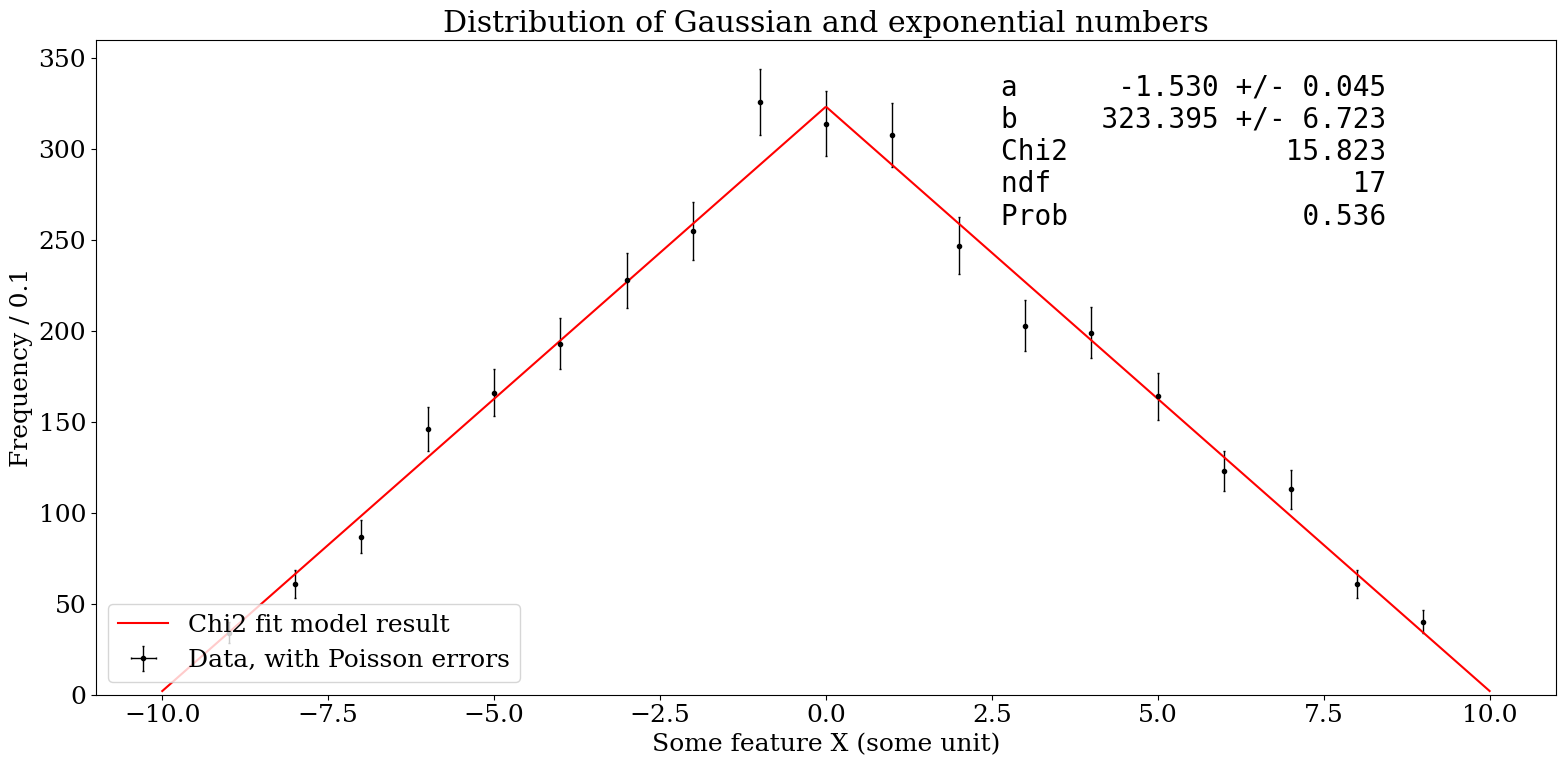

In [295]:
# Create just a single figure and axes, along with a histogram with uncertainties:
fig, ax = plt.subplots(figsize=(16, 8))  # figsize is in inches
ax.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="Some feature X (some unit)", # the label of the y axis
       ylabel="Frequency / 0.1",  # the label of the y axis
       title="Distribution of Gaussian and exponential numbers", # the title of the plot
       ylim=[0.0,None]) # Setting the miminum to zero

# Adding fit function to plot:
x_axis = np.linspace(-10, 10, 1000)
ax.plot(x_axis, triangle(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

# Adding fit results to plot:
d = {'a':   [minuit_chi2.values['a'], minuit_chi2.errors['a']],
     'b':       [minuit_chi2.values['b'], minuit_chi2.errors['b']],
     'Chi2':     chi2_value,
     'ndf':      Ndof_value,
     'Prob':     Prob_value,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.62, 0.95, text, ax, fontsize=20)
ax.legend(loc='lower left', fontsize=18); # could also be # loc = 'upper right' e.g.
fig.tight_layout()

In [296]:
def exp(x, a, b):
    return a * np.exp(b * x)

# Find the x, y and error on y (sy) given the histogram:
counts_ind, bin_edges_ind = hist_index
x = (bin_edges_ind[1:] + bin_edges_ind[:-1])/2
y = counts_ind
sy = np.sqrt(counts_ind)   # NOTE: We (naturally) assume that the bin count is Poisson distributed.
                       # This is an approximation, since there is a low count in the last bins.

# Did you make sure, that all bins were non-zero???
x = (bin_edges_ind[1:][counts_ind>0] + bin_edges_ind[:-1][counts_ind>0])/2
y = counts_ind[counts_ind>0]
sy = np.sqrt(counts_ind[counts_ind>0])   # NOTE: We (naturally) assume that the bin count is Poisson distributed.

# Alternatively, use the Chi2 regression from External Functions:
chi2fit = Chi2Regression(exp, x, y, sy)

# NOTE: Did you remember to ensure, that all bins had entries in them, i.e. that y>0?

minuit_chi2 = Minuit(chi2fit, a=0.0, b=0.0)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 33.54                      │              Nfcn = 97               │
│ EDM = 1.21e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    40     │     4     │            │            │         │         │       │
│ 1 │ b    │  -0.117   │   0.009   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │      13.2 -24.56e-3 │
│ b │ -24.56e-3  7.38e-05 │
└───┴─────────────────────┘

In [297]:
# First, check if the result was a valid minimum:
if (not minuit_chi2.fmin.is_valid) :
    print("  WARNING: The ChiSquare fit DID NOT converge!!! ")    
    
# Short hand way of accessing the fit parameters:
fit_a, fit_b = minuit_chi2.values[:]   # The fitted values of the parameters

# Loop to get both parameter values and uncertainties:
for name in minuit_chi2.parameters :
    value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

# Get Chi2 value:
chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

# Get number of degrees-of-freedom (Ndof):
N_NotEmptyBin = np.sum(y > 0)
Ndof_value = N_NotEmptyBin - minuit_chi2.nfit

Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value:5.3f}")

Fit value: a = 39.75207 +/- 3.63589
Fit value: b = -0.11661 +/- 0.00859
Chi2 value: 33.5   Ndof = 34    Prob(Chi2,Ndof) = 0.490


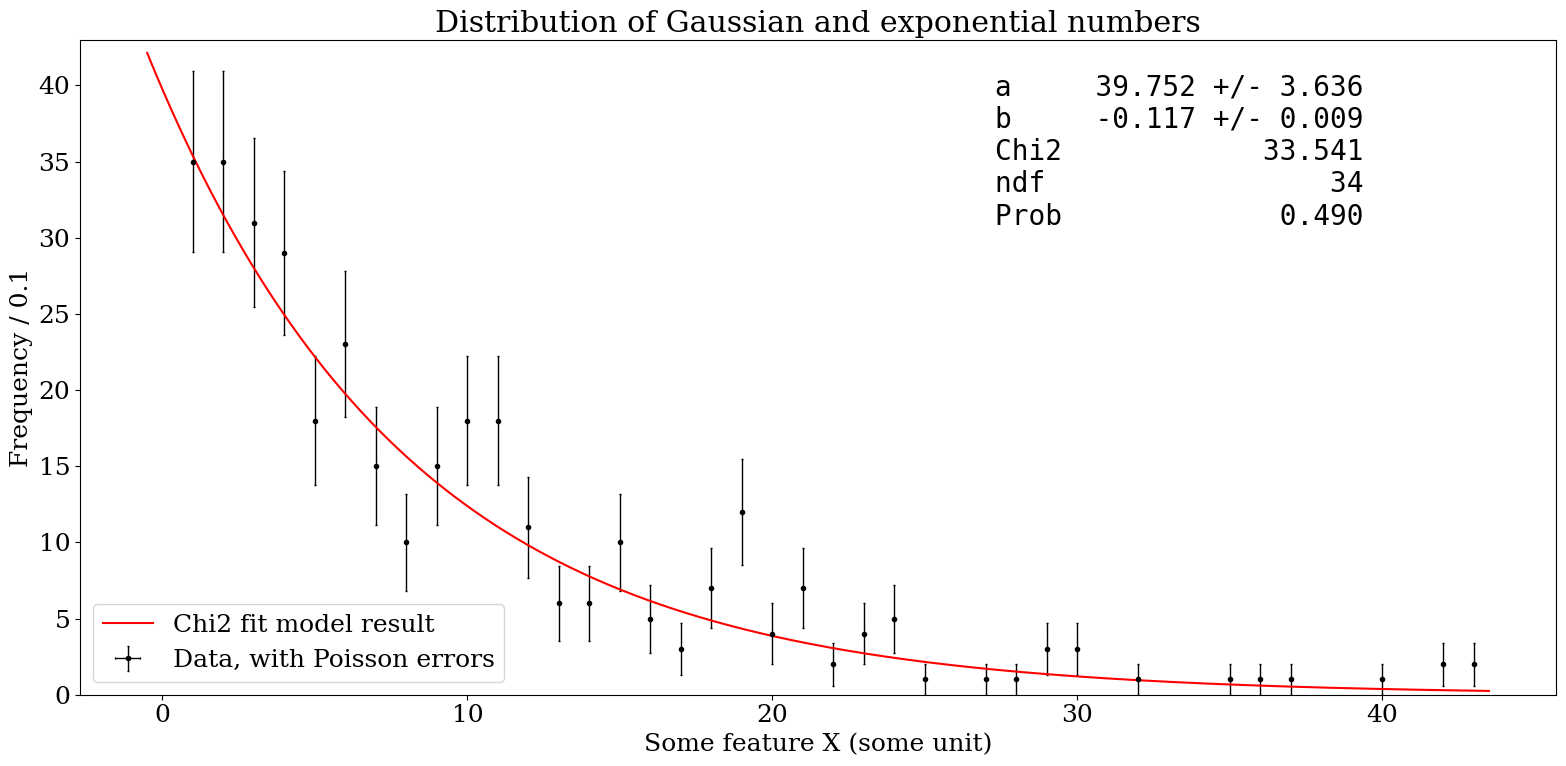

In [298]:
# Create just a single figure and axes, along with a histogram with uncertainties:
fig, ax = plt.subplots(figsize=(16, 8))  # figsize is in inches
ax.errorbar(x, y, yerr=sy, xerr=0.0, label='Data, with Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

# Set the figure texts; xlabel, ylabel and title.
ax.set(xlabel="Some feature X (some unit)", # the label of the y axis
       ylabel="Frequency / 0.1",  # the label of the y axis
       title="Distribution of Gaussian and exponential numbers", # the title of the plot
       ylim=[0.0,None]) # Setting the miminum to zero

# Adding fit function to plot:
x_axis = np.linspace(-0.5, max(numbers_index_0)+0.5, 1000)
ax.plot(x_axis, exp(x_axis, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

# Adding fit results to plot:
d = {'a':   [minuit_chi2.values['a'], minuit_chi2.errors['a']],
     'b':       [minuit_chi2.values['b'], minuit_chi2.errors['b']],
     'Chi2':     chi2_value,
     'ndf':      Ndof_value,
     'Prob':     Prob_value,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.62, 0.95, text, ax, fontsize=20)
ax.legend(loc='lower left', fontsize=18); # could also be # loc = 'upper right' e.g.
fig.tight_layout()

## Compare sequence frequency with Poisson hypothesis (for sequence length 3):

The probability of any specific sequence of three digits has probability $1/1000$ for random numbers. With $N$ digits (roughly 5000 here), each sequence should be represented $lambda = N/1000$ times, and as $p$ of a specific sequence is small and the number of sequences $N$ is large, the distribution of sequence frequency should follow a Poisson distribution. This is tested below.

In [299]:
# Poisson:
# -------------
def func_Poisson(x, N, lamb) :
    if (x > -0.5) :
        return N * stats.poisson.pmf(x, lamb)
    else : 
        return 0.0
    
func_Poisson_vec = np.vectorize(func_Poisson)

### Count how many of each sequency:

Thus, for sequences of length 3 there are 1000 posibilities, which are then counted in a histogram spanning 1000 bins. This works for all seqence lengths!

The below is a way of giving each sequence a uniqe number as a way of turing it into a 1D array.

In [300]:
seq = []
for i in range(-2, len(numbers)-2) : 
    seq.append(100*numbers[i] + 10*numbers[i+1] + numbers[i+2])
seq = np.array(seq)

# Put it into a histogram, which spans all possible outcomes:
poisson_counts, _ = np.histogram(seq, 1001, range=(-0.5, 1000.5))

### Plotting the distribution (in the relevant range):

Note the binning, which is (again) made to match integers in a range (this little trick/choice is very useful):

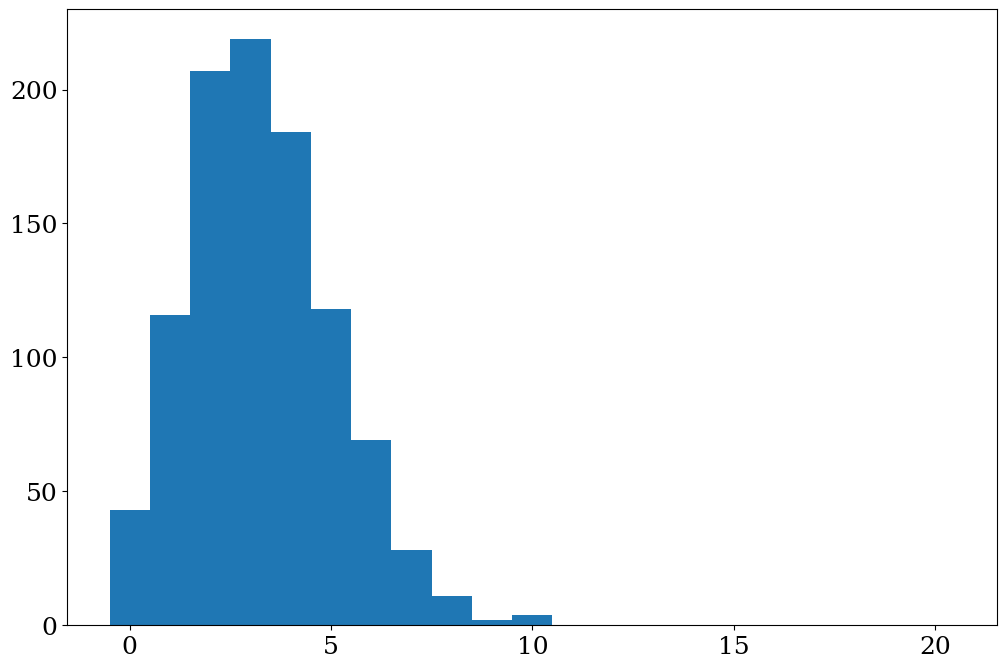

In [301]:
Nbins = 21
xmin, xmax = -0.5, 20.5

fig3, ax3 = plt.subplots(figsize=(12,8))
hist_poisson3 = ax3.hist(poisson_counts, Nbins, range=(xmin, xmax))

counts, x_edges, _ = hist_poisson3
x_centers = 0.5*(x_edges[1:] + x_edges[:-1])

In [302]:
x = x_centers[counts>0]
y = counts[counts>0]
sy = np.sqrt(y)

chi2_object = Chi2Regression(func_Poisson, x, y, sy)
minuit = Minuit(chi2_object, N=1000, lamb=poisson_counts.mean())
minuit.migrad()     # Launch the fit

chi2_val = minuit.fval
N_DOF = len(y) - len(minuit.values)
chi2_prob = stats.chi2.sf(chi2_val, N_DOF)
print("The Poisson fit yields a probability of {:8.6f}".format(chi2_prob))

The Poisson fit yields a probability of 0.701407


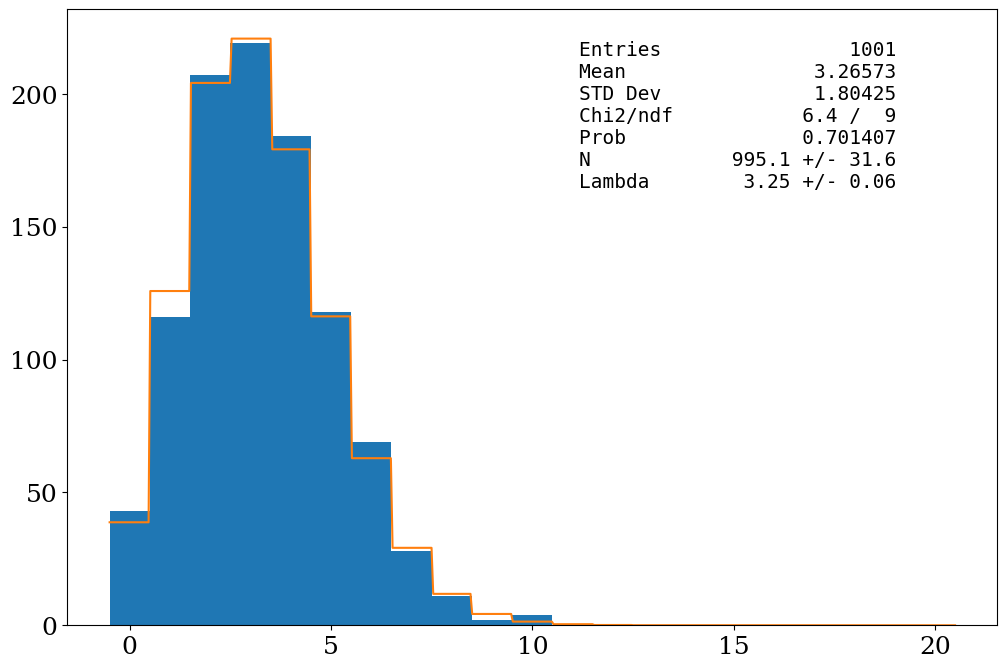

In [303]:
d = {'Entries'  : "{:d}".format(len(poisson_counts)),
     'Mean'     : "{:.5f}".format(poisson_counts.mean()),
     'STD Dev'  : "{:.5f}".format(poisson_counts.std(ddof=1)),
     'Chi2/ndf' : "{:.1f} / {:2d}".format(chi2_val, N_DOF),
     'Prob'     : "{:.6f}".format(chi2_prob),
     'N'        : "{:.1f} +/- {:.1f}".format(minuit.values['N'], minuit.errors['N']),
     'Lambda'   : "{:.2f} +/- {:.2f}".format(minuit.values['lamb'], minuit.errors['lamb'])
    }

ax3.text(0.55, 0.95, nice_string_output(d),
    family='monospace',
    transform=ax3.transAxes, fontsize=14,
    verticalalignment='top');

binwidth = (xmax-xmin) / Nbins 
xaxis = np.linspace(xmin, xmax, 500)
yaxis = binwidth*func_Poisson_vec(np.floor(xaxis+0.5), *minuit.values)
ax3.plot(xaxis, yaxis)
fig3

Questions:
---
 1. Discuss with your peers, what criteria truly random numbers should satisfy, and how these criteria can be tested.
    Based on this and on the discussion in class, write up such tests, and run all the datasets through your tests to
    see if some do not seem to be truly random.

*Example Solution to problem 1*:<br>

There is a near infinity of possible tests, but an example list of the simplest could be:
 - Runs test of even-odd, high-low, and in fact any division of the numbers (also un-even size groups).
 - ChiSquare test of distribution of sequences of digits. Given about 6000 digits, test of 1-5 lengths sequences makes good sense.
 - Check of (cor)relation between digits with a certain distance between them, to check for copies or shifts of data. Thus the 2 sequence test with N digits between them still has 100 outcomes, which for truly random numbers (null hypothesis) should be evenly distributed.
 - Kolmogorov-Smirnov test of distribution of digit frequences (to check if there is a shift too "slow" to be detected by the ChiSquare.
 - Consider sums of N consequtive numbers, where again the distrution of truly random digits is known.

 2. While one dataset is truly random, another consists of decimals from $\pi$. Apart from your own data, the other
    data sets are the result of using random numbers, but applying shifting, copying, and using biased selections.
    The non-human data sets are thus supposedly more regular (in some sense) than the humanly generated one. See if
    you can determine which one is "your" (humanly generated) data.

*Example Solution to problem 2*:<br>

The true source of the different files is given below. The human/student file should be the easiest to spot, as there is data enough for it to fail several simple tests. The truly random and pi digits are truly random, and thus it requires the pi-digit file to tell which is which. The "100 digits with shift" and "ObviouslyNonRandom" should be clearly detected by the third test suggested above, as it will for N=100 give perfect correlation! The Four Gaussians suffer in their digit frequency and also having an ordering of the digits, which should make these possible to spot.

The different datasets were distributed as follows (thus "E" was the humanly produced from the questionaire):

* A: data_RandomDigits2023_TrulyRandom.txt
* B: data_RandomDigits2023_ObviouslyNonRandom.txt (Series of length 11 7 tables, shifted randomly (mod 10)).
* C: data_RandomDigits2023_FourGaussians.txt (Second digit from cycling between four random Gaussians with sigma=2.5)
* D: data_RandomDigits2023_100WithShift.txt (The same 100 random digits with a random shift (mod 10)).
* E: data_RandomDigits2023_FromStudents.txt
* F: data_RandomDigits2023_DigitsOfPi.txt

# Learning points:

This exercise should generally make you capable of:
1. Designing (simple) hypothesis tests
2. Coding them up
3. Applying them to data
4. Interpreting the results

You should be highly aware, that a fully correct test may not "discover" anything, even if there is an effect. For example, testing if two samples are alike, and checking if the means are consistent is a test. And they may be consistent, even if the two samples are _very_ different.

However, if just **one** test shows a significant deviation from the null hypothesis, then it falls.